# <b>Girl Power: Are Female Candidates Making An Impact on Local Elections?</b>

# ***Executive Summary***

<p style="text-align: justify">
&emsp;The Philippines boasts of having the first woman president in Asia but after two women presidents and several women Senators, does local politics at the regional level reflect the same preference? To help us glean insights, this study aims to determine if 2016 female mayoral politicians made an impact on development and urbanization on a regional level. To tackle the problem, we take the provinces with the highest and lowest urbanization growth from 2015 to 2020 based on census data. The results were the following provinces:
</p>
<center><img src="ph_map.png" height="898" width="698"/></center>
<br>    
<b>Highest increase in urbanization growth from 2015-2020:</b>
    
<ul>
<li>Pangasinan</li>
<li>Pampanga</li>
<li>Palawan</li>
<li>Guimaras</li>
<li>Biliran</li>
<li>Sarangani</li>
</ul>
    
<b>Lowest increase in urbanization growth from 2015-2020:</b>
 
<ul>
<li>Siquijor</li>
<li>Camiguin</li>
<li>Lanao Del Sur</li>
</ul>

<p style="text-align: justify">
&emsp;To supplement the data, the team also conducted manual collection of information to determine the gender of the 2016 mayoral candidates in 9 out of these 20 provinces. Six of which are from the high urban growth provinces namely: Sarangani, Biliran, Guimaras, Pampanga, Palawan and Pangasinan. Three are from the low urban growth provinces which are Lanao, Camiguin and Siquijor.
</p>

<p style="text-align: justify">
&emsp;Exploratory data analysis shows us the distribution of male and female candidates as well as their win rates within their respective cities or municipalities. While it could be observed that females have a better win rate among male counterparts, there are still more candidates running for office thus a relevant scoring metric was conducted to even out and measure the impact of the winning candidate.
</p>

<p style="text-align: justify">
&emsp;For further exploration, we highly recommend looking at all provinces and their respective mayoral candidates and winners, and conduct further analysis via hypothesis testing to determine statistical significance of women mayors with urbanization.
</p>



# ***Introduction***
<br><br>
<center><img src="women_politicians.jpg" height="698" width="498"/></center>
<br><br>

<p style="text-align: justify">
&emsp;Women have fought long and hard to have a seat at the table at various levels of society, work, and especially in the area of politics. In the Philippine setting, the country is highly advanced in gender equality awareness among countries in Asia. The 1987 Constitution “recognizes the role of women in nation-building, and shall ensure the fundamental equality before the law of women and men (Article II).” All government entities are required to dedicate at least 5% of their budget to gender issues. Still, patriarchal views, values, and practices are the norm. One of the key areas of improvement is reproductive rights and health issues, with contraception, abortion, and divorce as highly controversial topics in the predominantly Catholic nation. 
</p>

<p style="text-align: justify">
Although the country is taking the initiative to raise gender equality at the political level, it is also crucial to assess what these elected women bring to the table. In this study, we explore the impact of gender in Philippine politics at the mayoral level. Do provinces that experienced rapid urbanization have a more progressive outlook on female candidates? Can the opposite be said for provinces that experienced rapid deurbanization? Does a change in urbanization have any effect on the re-election prospects of candidates? We explore these questions and more in our analysis of the Philippines census and statistical data from 2015 to 2020.
</p>

# ***Methodology***

<p style="text-align: justify">
&emsp;To analyze the impact of female candidates on local elections, this study employed the methodology pipeline as described in the figure. 

<br><br>
<center><img src="methodology.png" height="1098" width="898"/></center>
<br>
    
<ul>    
<li><b>Data Retrieval.</b> The primary datasets, Philippine Census and 2016 Raw Elections, used in this study were retrieved from /mnt/data/public/</li>
<li><b>Manual Data Collection.</b> Since the primary datasets lacked a crucial dimension of this study, gender of mayoral candidates, manual collection of this information was also performed.</li>
<li><b>Database Consolidation.</b> All datasets were then consolidated into a final dataframe and stored into an SQLite Database.</li>
<li><b>Feature Engineering.</b> Additional features were added to compute the win rate of a candidate based on their gender, and the gender of their competitors.</li>

Added Feature:
    Win Impact Score - normalized index score that quantifies the competitive advantage against the other gender.
    
\begin{align*}
    \text{Win Impact Score} = \frac{N_{total}}{N_{f/m}}
\end{align*}
 
\begin{align*}
N_{total} :& \text{  Total Number of Candidates in the City}
\\N_{f/m} :& \text{  Number of Candidates of the Same Gender as the Elected Mayor}
\\
\\
\end{align*}


<li><b>Exploratory Data Analysis.</b> Descriptive analytics was then performed to extract relevant insights in an attempt to answer the study’s objectives.</li>
</ul>
    
&emsp;The succeeding sections will explore and discuss each of these steps in great detail. 
</p>

# ***Data*** 

## **Data Description** 

<p style="text-align: justify">
&emsp;This study made use of two primary datasets: (1) Census data from 2015 to 2020 contained information on provincial population and was used to extract information on which provinces increased or decreased in urbanization over the 5-year period; (2) 2016 Raw Philippine Elections data contained information on a per VCM per candidate granularity, and were consolidated to extract only mayoral candidates from top urbanized and deurbanized provinces. To further supplement this analysis, manual data collection on the gender of mayoral candidates, re-election flag, and COMELEC’s proclamation of winners was performed. The final consolidated table was then stored in an SQLite database as the study’s single source of truth in the analysis step. The variables, along with its source and description, are laid out in the table below. 



<table>
  <tr>
    <th>Variable</th>
    <th>Source</th>
    <th>Data Type</th>
    <th>Data Description</th>
  </tr>
  <tr>
    <td>votes</td>
    <td>/mnt/data/public/elections/nle2016</td>
    <td>Integer</td>
    <td>The total number of votes received per vcm</td>
  </tr>
  <tr>
    <td>city</td>
    <td>/mnt/data/public/elections/nle2016</td>
    <td>String</td>
    <td>The city where the vcm is located</td>
  </tr>
  <tr>
    <td>province</td>
    <td>/mnt/data/public/elections/nle2016</td>
    <td>String</td>
    <td>The province where the vcm is located</td>
  </tr>
  <tr>
    <td>party</td>
    <td>/mnt/data/public/elections/nle2016</td>
    <td>String</td>
    <td>The political party affiliation of the candidate</td>
  </tr>
  <tr>
    <td>name</td>
    <td>/mnt/data/public/elections/nle2016</td>
    <td>String</td>
    <td>The official name of candidate verified by comelec for election</td>
  </tr>
  <tr>
    <td>urbanized</td>
    <td>/mnt/data/public/elections/nle2016</td>
    <td>String</td>
    <td>The urbanization label of the province in the 2020 census if it increased or decreased</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>gender_tagging.csv</td>
    <td>String</td>
    <td>Manually researched gender categories per candidate if male or female</td>
  </tr>
  <tr>
    <td>Re-Electionist</td>
    <td>gender_tagging.csv</td>
    <td>String</td>
    <td>Manually researched labels if a candidate is running for another election mayoral term</td>
  </tr>
  <tr>
    <td>Year Elected</td>
    <td>gender_tagging.csv</td>
    <td>Integer</td>
    <td>Manually research labels for each candidate when they were initially elected</td>
  </tr>
  <tr>
    <td>Results</td>
    <td>/mnt/data/public/elections/nle2016</td>
    <td>String</td>
    <td>Manually researched labels based on Comelec’s proclamation of winners</td>
  </tr>
</table>

</p>

## **Data Assumptions & Limitations** 

<p style="text-align: justify">
&emsp;Based on the past elections, Philippine voters appear to be regionalistic when it comes to voting. That is, the upset wins happen and political dynasties topple at the mayoral level (e.g., Vico Sotto, Isko Moreno, Marcy Teodoro). Due to the “traditional” voting behavior on the national level, this study looked into the voting patterns on regional/mayoral level; hence, only mayoral candidates were captured from the elections data. Major limitations of the study also involve data inclusion and exclusion criteria. Due to time constraints of the study, the researchers only considered elected mayoral candidates in 2016, and urbanization rate from 2015 to 2020. Subsequently, the researchers further limited the scope to mayoral candidates coming from the top urbanized and deurbanized provinces

</p>

 ## **Data Preprocessing**

In [1]:
# Import relevant libraries/modules
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import tqdm
import numpy as np
import sqlite3
import glob
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


plt.rcParams.update({'font.size': 13})

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8m0y2cp7 because the default path (/home/jfabrero/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


**Census Data**

<p style="text-align: justify">
&emsp;The Philippine Census data was mainly used to extract information on provinces that increased or decreased in urbanization from 2015 to 2020. Hence, only the columns City/Province, Total Population, Urban Population, and Percent Urban in 2015 and 2020, respectively, were selected. Furthermore, values under the City/Province that are cities and regions were excluded since the study only needs urbanization rate on the provincial level. 
</p>

In [2]:
# Looking at the census data
fpath_census = ('/mnt/data/public/census/2020/' +
                '1_2020 CPH_Urban Population_PR Statistical Tables_RML_063022_ONS (2).xlsx')
df_census = pd.read_excel(fpath_census,
                          skiprows=6,
                          header=3,
                          usecols=[0, 1, 2, 4, 5, 7, 8],
                          index_col=0)

df_census = (df_census[~df_census.index.str.contains(
    r'ARMM|REGION|^City|City$|Interim', na=False)]
    .dropna()
    .reset_index())
col_names = ['City/Province',
             'Total Population (2020)',
             'Total Population (2015)',
             'Urban Population (2020)',
             'Urban Population (2015)',
             'Percent Urban (2020)',
             'Percent Urban (2015)',
             ]
df_census.columns = col_names

**Raw Philippine Election Data**

<p style="text-align: justify">
&emsp;The 2016 election data contains information on a per electoral position per VCM level. To make data retrieval less intensive, only results from the top urbanized and deurbanized provinces were consolidated. As each VCM data was loaded, the following variables were extracted/created:

- **city**, **province**  - The values were sliced from each file path to the VCM json tables.
- **name**, **party** - The values were respectively extracted from **bName** (var name in json files) using regex.
- **urbanized** - The values refer to the province of the mayoral candidate and tagged as increased if the province is in the list of urbanized provinces. Otherwise, it is tagged decreased.

&emsp;Once these columns are generated, the resulting VCM data frames are concated into one table.


In [3]:
# The Nine Representative Provinces chosen for EDA
prov_list = ['PANGASINAN',
             'PAMPANGA',
             'PALAWAN',
             'GUIMARAS',
             'BILIRAN',
             'SARANGANI',
             'SIQUIJOR',
             'CAMIGUIN',
             'LANAO DEL SUR'
             ]

In [4]:
# Data Retrieval and Variable Creation
dfs = []

for prov in prov_list:
    f_path = ('/mnt/data/public/elections/nle2016/PHILIPPINES/*/'
              + prov
              + '/*/*/*/MAYOR '
              + prov
              + '*.json'
              )
    f_list = glob.glob(f_path)
    for file in f_list:
        with open(file) as f:
            json_data = pd.json_normalize(json.loads(f.read()), 'results')
            json_data['city'] = file.split('/')[-4]
            json_data['province'] = prov
            json_data['party'] = json_data['bName'].str.extract(r'\((.*)\)')
            json_data['name'] = json_data['bName'].str.extract(r'(.*) \(')
            json_data['urbanized'] = (
                np.where(json_data['province'].isin(['LANAO DEL SUR',
                                                    'CAMIGUIN',
                                                     'SIQUIJOR']),
                         'decreased',
                         'increased')
            )
            dfs.append(json_data.drop(columns=['bName',
                                               'percentage',
                                               'canCode']))

df_nle2016 = (pd.concat(dfs, sort=False).reset_index(drop=True)
              .merge(pd.read_csv('gender_tagging_v4.csv'),
                     on='name', how='left')
              )

In [5]:
# Database Consolidation
conn = sqlite3.connect('data_extract.db')
df_nle2016.to_sql('nle2016',
                  conn,
                  if_exists='replace',
                  index=False)
df_census.to_sql('census',
                 conn,
                 if_exists='replace',
                 index=False)
pd.read_csv('win.csv').to_sql('wins',
                              conn,
                              if_exists='replace',
                              index=False)

517

# ***Exploratory Data Analysis***


## **Top provinces that increased or decreased in urbanization from 2015 to 2020**

<p style="text-align: justify">
&emsp;The figure below shows the top 10 provinces that increased or decreased in urbanization, respectively. For the purposes of narrowing down the study, we look at provinces whose urbanization rates are greater than 7% (rapid urbanization) or less than -7% (rapid deurbanization), as highlighted in the figure.
</p>

In [6]:
# Pull from Database
conn = sqlite3.connect('data_extract.db')
sql1 = """ SELECT "City/Province" AS province, 
"Percent Urban (2020)" - "Percent Urban (2015)" as pct_change_urban 
FROM census
ORDER BY pct_change_urban
"""
df_pct = pd.read_sql(sql1, conn)

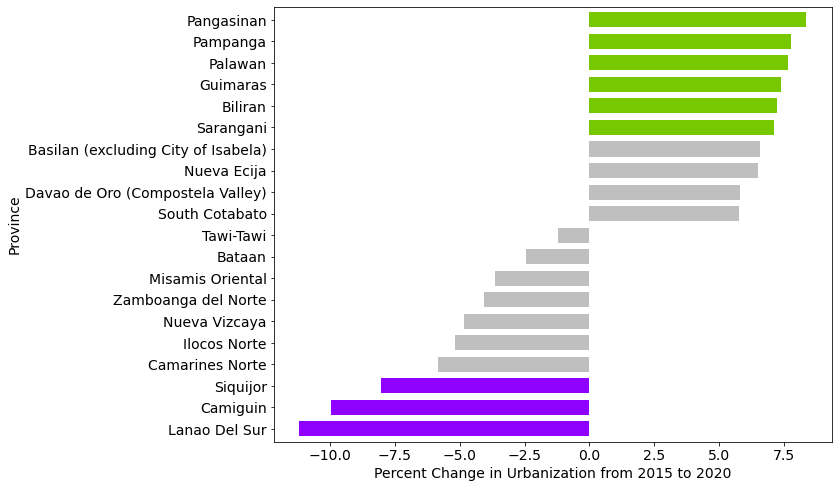

In [7]:
# Plot Census Data
plot_pct = pd.concat([df_pct.head(10), df_pct.tail(10)],
                     ignore_index=True).set_index('province')
clr = np.select([plot_pct.pct_change_urban >= 7,
                 plot_pct.pct_change_urban <= -7],
                ["#77c800", "#8f00ff"], default="#bfbfbf")

plot_pct.plot(kind='barh', y='pct_change_urban', color=clr,
              figsize=(10, 8), legend=False, width=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Percent Change in Urbanization from 2015 to 2020', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.grid(visible=False)
plt.show()

## **Average Number of Candidates per City**

<p style="text-align: justify">
&emsp;Out of the 9 representative provinces, 6 were urbanized and 3 were deurbanized. 
The provinces in green represent those with the highest urbanization grown and the ones in red are ones with the least urbanization growth from 2015-2020.
</p>

In [8]:
# Pull database
conn = 'sqlite:///data_extract.db'
sql = """
SELECT *
FROM nle2016
"""

# Aggregrate the votes and limit columns
df = pd.read_sql(sql, conn)
df['votes'] = df['votes'].astype('int')
df_agg = df.groupby(df.columns.tolist()[1:7])['votes'].sum().reset_index()

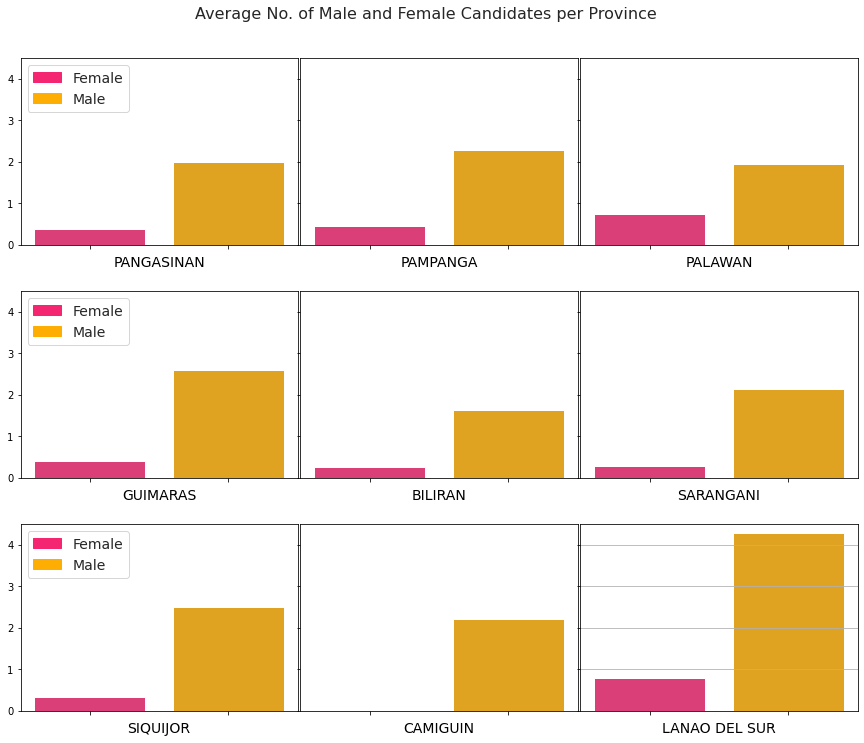

In [9]:
# Query for each 'province, group by 'city' and plot

fig, axes = plt.subplots(3, 3,
                         figsize=(15, 12),
                         sharey=True,
                         gridspec_kw={'wspace': .01,
                                      'hspace': .25})

for i, province in enumerate(prov_list):
    df_prov = df_agg.query('province == @province')

    df_city = df_prov.groupby(['city', 'Gender']).size().reset_index()
    df_city.columns = ['city', 'gender', 'count']
    df_plot = df_city.groupby('gender').sum()
    df_plot['count'] = df_plot['count'] / df_city['city'].nunique()
    df_plot = df_plot.reset_index().sort_values('gender', ascending=True)

    while len(df_plot) < 2:
        gender = [i for i in ['male', 'female']
                  if i not in df_plot['gender'].values.tolist()]
        df_add = pd.DataFrame({'gender': gender, 'ratio': [0]*len(gender)})
        df_plot = pd.concat([df_plot, df_add]).sort_values('gender',
                                                           ascending=True)

    # Set Palettes
    palette = ['#f42571', '#feae02']

    # Plot
    sns.set_style("whitegrid")
    sns.barplot(data=df_plot,
                x='gender',
                y='count',
                palette=palette,
                ax=axes[int(i/3), i % 3])

    # Set Visible Labels
    axes[int(i/3), i % 3].set_xlabel(province, fontsize=14)
    axes[int(i/3), i % 3].set_ylabel(None)
    axes[int(i/3), i % 3].set_xticklabels([])
    axes[int(i/3), i % 3].set_yticks(range(5), fontsize=14)

    # Set Legend for each Row
    if i % 3 == 0:
        green_fem = mpl.patches.Patch(color='#f42571', label='Female')
        green_male = mpl.patches.Patch(color='#feae02', label='Male')
        axes[int(i/3), i % 3].legend(handles=[green_fem, green_male],
                                     loc='upper left', fontsize=14)

    plt.grid(axis='y')

    # Set Title for the Whole Figure
    fig.suptitle('Average No. of Male and Female Candidates per Province',
                 fontsize=16, y=.94)
    fig.show()

## **Percentage of Cities w/ Female Candidates**

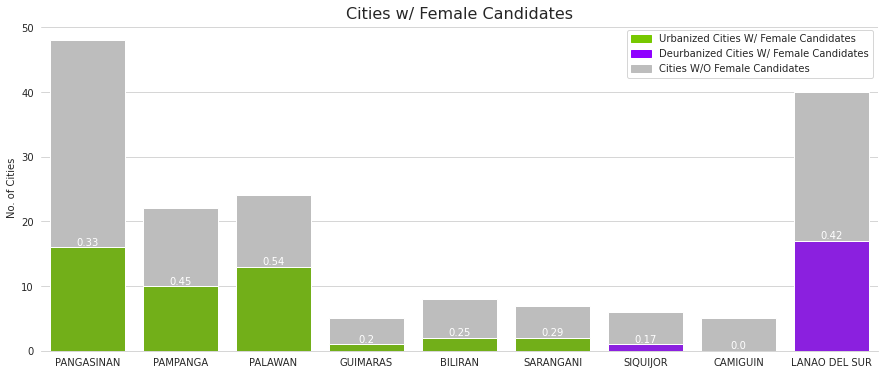

In [10]:
# Plot Percentage of Cities w/ Female Candidates
df_has_female = (df_agg.groupby(['city', 'province', 'Gender'])
                 .size()
                 .reset_index())
df_has_female['has_female'] = df_has_female['Gender'] == 'female'
df_has_female = (df_has_female.groupby('province')['has_female']
                              .sum()
                              .reset_index())

df_n_city = df.groupby(['province'])['city'].nunique().reset_index()

df_plot = pd.merge(df_has_female,
                   df_n_city['city'],
                   left_index=True,
                   right_index=True).set_index('province')
df_plot['percentage'] = df_plot['has_female'] / df_plot['city']

fig, axes = plt.subplots(1, 1,
                         figsize=(15, 6),
                         sharey=True,
                         gridspec_kw={'wspace': .01})

sns.set_style("whitegrid")
sns.barplot(data=df_plot.loc[prov_list],
            x=prov_list,
            y='city',
            color='#bdbdbd',
            ax=axes)
palette = ['#77c800', '#77c800', '#77c800', '#77c800', '#77c800', '#77c800',
           '#8f00ff', '#8f00ff', '#8f00ff']
sns.barplot(data=df_plot.loc[prov_list],
            x=prov_list,
            y='has_female',
            palette=palette,
            ax=axes)
sns.despine(left=True)

axes.bar_label(axes.containers[1],
               df_plot.loc[prov_list]['percentage'].round(2),
               label_type='edge', color='white', )

axes.set_ylabel('No. of Cities')
axes.set_title('Cities w/ Female Candidates', fontsize=16)

green_fem = mpl.patches.Patch(color='#77c800',
                              label='Urbanized Cities W/ Female Candidates')
red_fem = mpl.patches.Patch(color='#8f00ff',
                            label='Deurbanized Cities W/ Female Candidates')
all_city = mpl.patches.Patch(color='#bdbdbd',
                             label='Cities W/O Female Candidates')
axes.legend(handles=[green_fem, red_fem, all_city], loc='upper right')

plt.show()

## **Percentage of Female Candidates Winning**

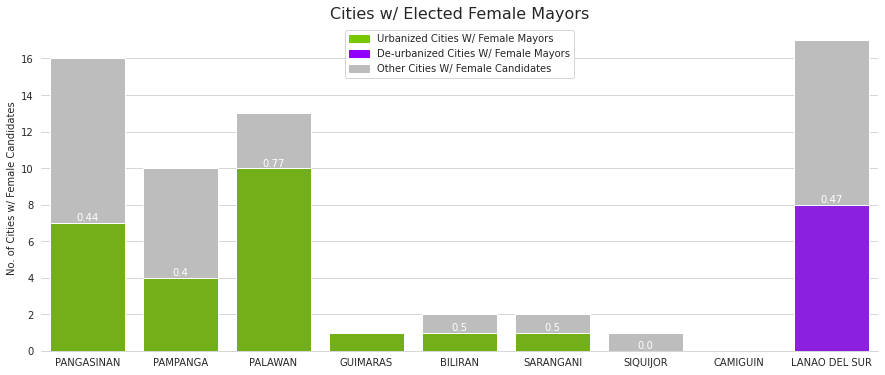

In [11]:
# Plot Percentage of Female Candidates Winning in Cities they ran in
df_votes = (df_agg.groupby(["city", "province", "name", "Gender"])["votes"]
            .sum()
            .reset_index())
df_votes_win = (df_votes.groupby(["city", "province"])["votes"]
                        .apply(max)
                        .reset_index())
df_votes_win = pd.merge(df_votes_win, df_votes,
                        how="left",
                        on=["city",
                            "province",
                            "votes"])

df_votes_win['female_won'] = df_votes_win['Gender'] == 'female'
df_votes_win = (df_votes_win.groupby('province')['female_won']
                            .sum()
                            .reset_index())

df_plot = pd.merge(df_has_female,
                   df_votes_win['female_won'],
                   left_index=True,
                   right_index=True).set_index('province')
df_plot['percentage'] = df_plot['female_won'] / df_plot['has_female']
df_plot.fillna(0, inplace=True)

fig, axes = plt.subplots(1, 1,
                         figsize=(15, 6),
                         sharey=True,
                         gridspec_kw={'wspace': .01})

sns.set_style("whitegrid")
sns.barplot(data=df_plot.loc[prov_list],
            x=prov_list,
            y='has_female',
            color='#bdbdbd',
            ax=axes)
palette = ['#77c800', '#77c800', '#77c800', '#77c800', '#77c800', '#77c800',
           '#8f00ff', '#8f00ff', '#8f00ff']
sns.barplot(data=df_plot.loc[prov_list],
            x=prov_list,
            y='female_won',
            palette=palette,
            ax=axes)
sns.despine(left=True)

axes.bar_label(axes.containers[1],
               df_plot.loc[prov_list]['percentage'].round(2),
               label_type='edge', color='white', )

axes.set_ylabel('No. of Cities w/ Female Candidates')
axes.set_title('Cities w/ Elected Female Mayors', fontsize=16)

green_fem = mpl.patches.Patch(color='#77c800',
                              label='Urbanized Cities W/ Female Mayors')
red_fem = mpl.patches.Patch(color='#8f00ff',
                            label='De-urbanized Cities W/ Female Mayors')
all_city = mpl.patches.Patch(color='#bdbdbd',
                             label='Other Cities W/ Female Candidates')
axes.legend(handles=[green_fem, red_fem, all_city], loc='upper center')

plt.show()

<p style="text-align: justify">
&emsp;Conducting initial analysis on candidacy rates and win rates of the mayoral candidates during the 2016 NLE, there is a ratio of 5 Male Candidates to 1 Female Candidate. There is no significant difference between the number of female candidates running per Province with increased or decreased urbanization. However, a notable finding in two cities Madalum and Sultan Dumalondong in Lanao del Sur fielded the most number of female candidates in the Mayoral Elections.
</p>

## **Comparison of Male vs Female Candidates**

In [12]:
# Comparison of Win Rates of Candidates
df_nle2016 = pd.read_sql("SELECT * FROM nle2016", conn)
df_nle2016['votes'] = df_nle2016['votes'].astype(int)

nle_male_candidates = df_nle2016[df_nle2016['Gender'] == 'male']
nle_female_candidates = df_nle2016[df_nle2016['Gender'] == 'female']

df_win = pd.read_sql("SELECT * FROM wins", conn)

nle_male_win = df_win[(df_win['Gender'] == 'male')
                      & (df_win['result'] == 'W')]
nle_female_win = df_win[(df_win['Gender'] == 'female')
                        & (df_win['result'] == 'W')]

male_win_rate = (len(nle_male_win['name'].unique())
                 / len(nle_male_candidates['name'].unique()))*100

fem_win_rate = (len(nle_female_win['name'].unique())
                / len(nle_female_candidates['name'].unique()))*100

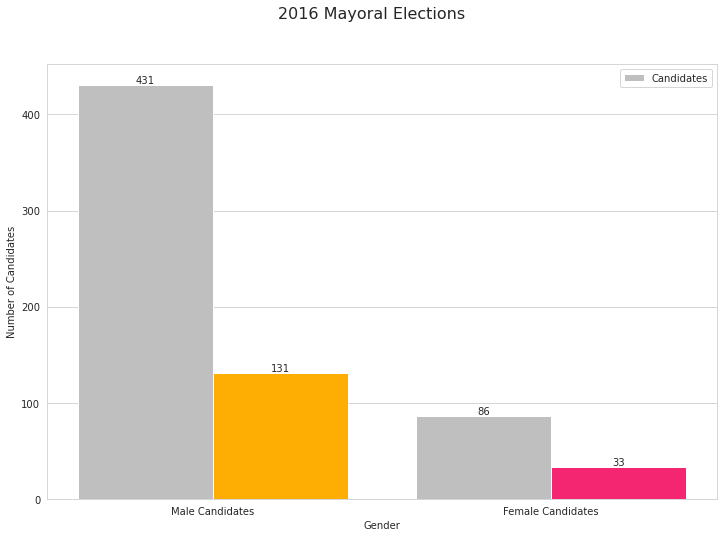

In [13]:
# Plot the Results
plt.figure(figsize=(12, 8))

X = ['Male Candidates', 'Female Candidates']
y = [len(nle_male_candidates['name'].unique()),
     len(nle_female_candidates['name'].unique())]
y_win = [len(nle_male_win['name'].unique()),
         len(nle_female_win['name'].unique())]

X_axis = np.arange(len(X))

nle_candidates = plt.bar(X_axis - 0.2, y, 0.4,
                         label='Candidates', color='#bfbfbf')
nle_winners = plt.bar(X_axis+0.2, y_win, 0.4,
                      label='_nolegend_', color=['#feae02', '#f42571'])


plt.suptitle('2016 Mayoral Elections', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.legend()
plt.xticks(X_axis, X)
plt.bar_label(nle_candidates)
plt.bar_label(nle_winners)
plt.grid(visible=None, axis='x')

plt.show()

<p style="text-align: justify">
&emsp;Comparing overall win rates across all provinces, Male candidates had a win rate of 30%, while in contrast with the 38% win rate of female candidates. However, the results are skewed against male candidates because there are more male candidates running during the election term compared to female candidates. Adding significance and weightage to the analysis was conducted in order to normalize win rates by gender.
</p>

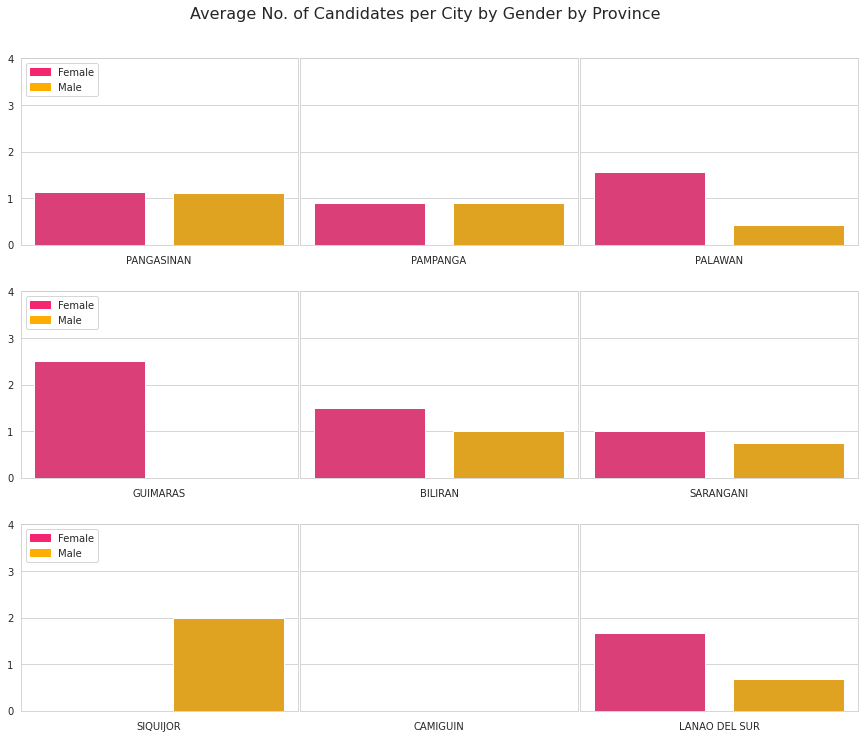

In [14]:
# Iterate Through all Provinces
fig, axes = plt.subplots(3, 3,
                         figsize=(15, 12),
                         sharey=True,
                         gridspec_kw={'wspace': .01,
                                      'hspace': .25})

for i, prov in enumerate(prov_list):

    # Filter to the province
    df_prov = df[df['province'] == prov]

    df_votes = (df_prov.groupby(["city", "name", "Gender"])["votes"]
                       .sum()
                       .reset_index())

    df_win = (df_votes.groupby(["city"])["votes"]
              .max()
              .reset_index())
    df_win['winner'] = 'yes'
    df_votes = pd.merge(df_votes,
                        df_win[['winner', 'city', 'votes']],
                        how='left', on=['city', 'votes'])

    df_candidates = (df_votes.groupby(["city"])[['Gender']]
                             .value_counts().to_frame('count'))
    df_n_males = df_candidates.query('Gender == "male"').reset_index()
    df_n_females = df_candidates.query('Gender == "female"').reset_index()

    df_win = pd.merge(df_win,
                      df_n_males[["city", "count"]],
                      how="left", on=["city"])
    df_win = pd.merge(df_win,
                      df_n_females[["city", "count"]],
                      how="left", on=["city"]).dropna()
    df_win['total'] = df_win['count_x'] + df_win['count_y']

    df_win = pd.merge(df_win,
                      df_votes[['Gender', 'city', 'votes']],
                      how='left', on=['city', 'votes'])
    df_win['ratio'] = 0
    df_win.loc[df_win.query('Gender == "male"').index, 'ratio'] = (
        df_win['total'] / df_win['count_x']
    )
    df_win.loc[df_win.query('Gender == "female"').index, 'ratio'] = (
        df_win['total'] / df_win['count_y']
    )

    df_plot = df_win.groupby(['Gender'])['ratio'].sum() / df_win.shape[0]
    df_plot = df_plot.to_frame().reset_index()

    while len(df_plot) < 2:
        gender = [i for i in ['male', 'female']
                  if i not in df_plot['Gender'].values.tolist()]
        df_add = pd.DataFrame({'Gender': gender, 'ratio': [0]*len(gender)})
        df_plot = pd.concat([df_plot, df_add]).sort_values('Gender',
                                                           ascending=True)

    # Set Palettes
    if i < 6:
        palette = ['#f42571', '#feae02']
    else:
        palette = ['#f42571', '#feae02']

    sns.set_style("whitegrid")
    sns.barplot(data=df_plot,
                x='Gender',
                y='ratio',
                palette=palette,
                ax=axes[int(i/3), i % 3])

    # Set Visible Labels
    axes[int(i/3), i % 3].set_xlabel(prov)
    axes[int(i/3), i % 3].set_ylabel(None)
    axes[int(i/3), i % 3].set_xticklabels([])
    axes[int(i/3), i % 3].set_yticks(range(5))

    # Set Legend for each Row
    if i < 6 and i % 3 == 0:
        green_fem = mpl.patches.Patch(color='#f42571', label='Female')
        green_male = mpl.patches.Patch(color='#feae02', label='Male')
        axes[int(i/3), i % 3].legend(handles=[green_fem, green_male],
                                     loc='upper left')
    elif i >= 6 and i % 3 == 0:
        red_fem = mpl.patches.Patch(color='#f42571', label='Female')
        red_male = mpl.patches.Patch(color='#feae02', label='Male')
        axes[int(i/3), i % 3].legend(handles=[red_fem, red_male],
                                     loc='upper left')

    # Set Title for the Whole Figure
    fig.suptitle('Average No. of Candidates per City by Gender by Province',
                 fontsize=16, y=.94)

<p style="text-align: justify">
&emsp;For the representative provinces, the overall win impact of females are generally higher than the males in urbanized provinces. In the deurbanized provinces, only Lanao del Sur had a non-zero impact score. This seemingly different behavior in Lanao del Sur can be attributed to the prevalent political gatekeeping in the said province.
</p>

## **Re-election in Urbanized vs Deurbanized Provinces**

In [15]:
# Comparison of Urbanized vs Deurbanized Provinces
df["votes"] = df["votes"].apply(int)
df_votes = (df.groupby(["city", "province", "urbanized",
                        "name", "Gender", "Re-Electionist"])["votes"]
            .sum().reset_index())

df_votes_win = (df_votes.groupby(["city", "province",
                                  "urbanized"])["votes"]
                .apply(max).reset_index())
df_votes_win = (pd.merge(df_votes_win, df_votes, how="left",
                         on=["city", "province", "votes", "urbanized"]))

df_votes_lose = (pd.concat([df_votes_win,
                            df_votes[["city", "province", "urbanized", "name",
                                      "Gender", "Re-Electionist", "votes"]]]))
df_votes_lose.sort_values(by="name", inplace=True)
df_votes_lose.drop_duplicates(keep=False, inplace=True)

# Increase in urbanization

# fem re-elect inc urban
fem_win_inc = (df_votes_win[(df_votes_win["Gender"] == "female") &
                            (df_votes_win["Re-Electionist"] == "yes") &
                            (df_votes_win["urbanized"] == "increased")]
               .count()[0])

# tot fem inc urban
fem_tot_inc = (df_votes[(df_votes["Gender"] == "female") &
                        (df_votes["Re-Electionist"] == "yes") &
                        (df_votes["urbanized"] == "increased")]
               .count()[0])

# male re-elect inc urban
male_win_inc = (df_votes_win[(df_votes_win["Gender"] == "male") &
                             (df_votes_win["Re-Electionist"] == "yes") &
                             (df_votes_win["urbanized"] == "increased")]
                .count()[0])

# tot male inc urban
male_tot_inc = (df_votes[(df_votes["Gender"] == "male") &
                         (df_votes["Re-Electionist"] == "yes") &
                         (df_votes["urbanized"] == "increased")]
                .count()[0])

# tot re-elect inc urban
tot_win_inc = (df_votes_win[(df_votes_win["Re-Electionist"] == "yes") &
                            (df_votes_win["urbanized"] == "increased")]
               .count()[0])

# tot inc urban
tot_inc = (df_votes[(df_votes["Re-Electionist"] == "yes") &
                    (df_votes["urbanized"] == "increased")]
           .count()[0])


# Decrease in urbanization

# fem re-elect dec urban
fem_win_dec = (df_votes_win[(df_votes_win["Gender"] == "female") &
                            (df_votes_win["Re-Electionist"] == "yes") &
                            (df_votes_win["urbanized"] == "decreased")]
               .count()[0])

# tot fem dec urban
fem_tot_dec = (df_votes[(df_votes["Gender"] == "female") &
                        (df_votes["Re-Electionist"] == "yes") &
                        (df_votes["urbanized"] == "decreased")]
               .count()[0])

# male re-elect dec urban
male_win_dec = (df_votes_win[(df_votes_win["Gender"] == "male") &
                             (df_votes_win["Re-Electionist"] == "yes") &
                             (df_votes_win["urbanized"] == "decreased")]
                .count()[0])

# tot male dec urban
male_tot_dec = (df_votes[(df_votes["Gender"] == "male") &
                         (df_votes["Re-Electionist"] == "yes") &
                         (df_votes["urbanized"] == "decreased")]
                .count()[0])

# tot re-elect dec urban
tot_win_dec = (df_votes_win[(df_votes_win["Re-Electionist"] == "yes") &
                            (df_votes_win["urbanized"] == "decreased")]
               .count()[0])

# tot dec urban
tot_dec = (df_votes[(df_votes["Re-Electionist"] == "yes") &
                    (df_votes["urbanized"] == "decreased")]
           .count()[0])

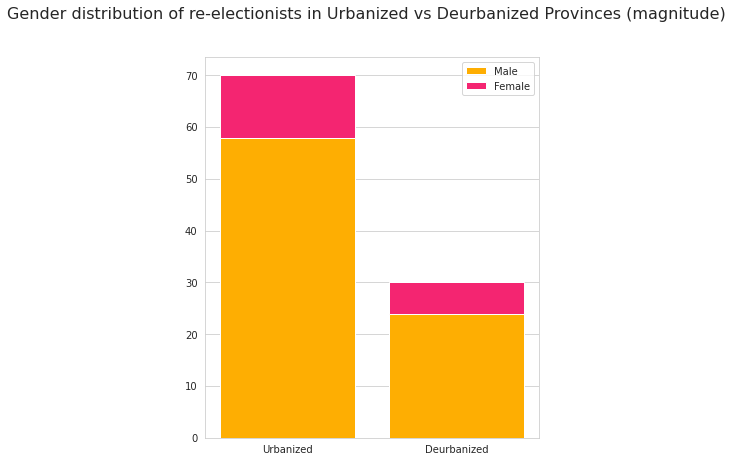

In [16]:
# Plot Gender distribution of re-electionists in Urbanized vs Deurbanized Provinces (magnitude)
x = ['Urbanized', 'Deurbanized']
male_num = [male_tot_inc, male_tot_dec]
fem_num = [fem_tot_inc, fem_tot_dec]

fig, ax = plt.subplots(figsize=(6, 7))
plt.suptitle("Gender distribution of re-electionists in " +
             "Urbanized vs Deurbanized Provinces (magnitude)",
             fontsize=16)
ax.bar(x, male_num, color='#feae02', label="Male")
ax.bar(x, fem_num, bottom=male_num, color='#f42571', label="Female")
ax.legend(loc="best")
plt.grid(visible=None, axis='x')
fig.show()

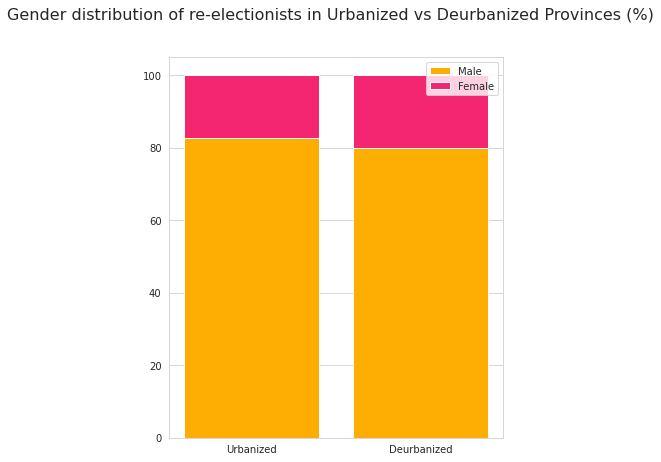

In [17]:
# Plot Gender distribution of re-electionists in Urbanized vs Deurbanized Provinces
x = ['Urbanized', 'Deurbanized']
male_tot = [male_tot_inc/tot_inc * 100, male_tot_dec/tot_dec * 100]
fem_tot = [fem_tot_inc/tot_inc * 100, fem_tot_dec/tot_dec * 100]

fig, ax = plt.subplots(figsize=(6, 7))
plt.suptitle("Gender distribution of re-electionists in " +
             "Urbanized vs Deurbanized Provinces (%)",
             fontsize=16)
ax.bar(x, male_tot, color='#feae02', label="Male")
ax.bar(x, fem_tot, bottom=male_tot, color='#f42571', label="Female")
ax.legend(loc="best")
plt.grid(visible=None, axis='x')
fig.show()

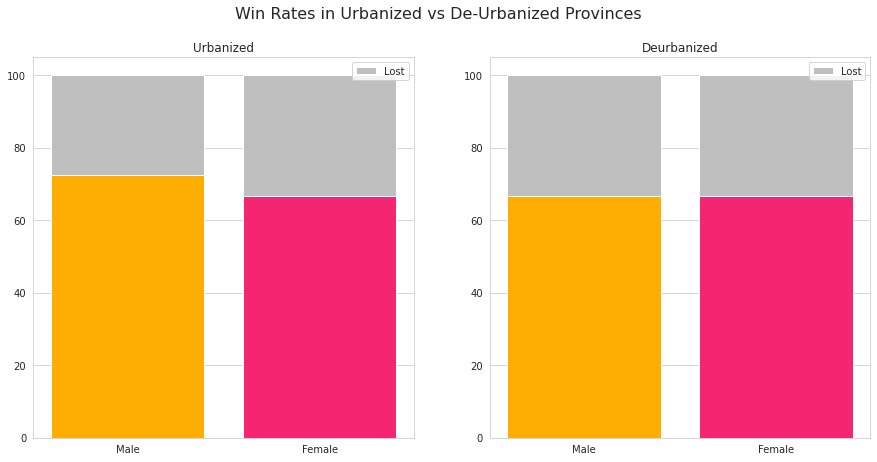

In [18]:
# create data
x = ['Male', 'Female']
won_inc = ([(male_win_inc / male_tot_inc) * 100,
            (fem_win_inc / fem_tot_inc) * 100])
lost_inc = ([100 - ((male_win_inc / male_tot_inc) * 100),
             100 - ((fem_win_inc / fem_tot_inc) * 100)])

won_dec = ([(male_win_dec / male_tot_dec) * 100,
            (fem_win_dec / fem_tot_dec) * 100])
lost_dec = ([100 - ((male_win_dec / male_tot_dec) * 100),
             100 - ((fem_win_dec / fem_tot_dec) * 100)])

# plot bars in stack manner
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 7))
ax1.set_title("Urbanized")
ax1.bar(x, won_inc, color=['#feae02', '#f42571'], label='_nolegend_')
ax1.bar(x, lost_inc, bottom=won_inc, color='#bfbfbf', label="Lost")
ax1.legend(loc="best")
ax1.grid(visible=None, axis='x')
ax2.set_title("Deurbanized")
ax2.bar(x, won_dec, color=['#feae02', '#f42571'], label='_nolegend_')
ax2.bar(x, lost_dec, bottom=won_dec, color='#bfbfbf', label="Lost")
ax2.legend(loc="best")
ax2.grid(visible=None, axis='x')
plt.suptitle('Win Rates in Urbanized vs De-Urbanized Provinces', fontsize=16)
fig.show()

<p style="text-align: justify">
&emsp;The distribution between the two genders among the re-electionist mayoral candidates was similar for both LGUs regardless of whether the city underwent urbanization or deurbanization. Re-election rate for mayors among deurbanized municipalities was only 5% lower than urbanized municipalities. Likewise, the re-election rate for either genders was almost similar. Changes in urbanization does not appear to contribute to a re-electionist's chance of re-election and neither does their gender.
</p>

# ***Results & Recommendations***

<p style="text-align: justify">
&emsp;Of the 86 female candidates out of the 517 total mayoral candidates from the 9 provinces, only 32 were elected into office. For the winning candidates, the researchers developed a **win impact score** - normalized index score that quantifies the competitive advantage against the other gender.


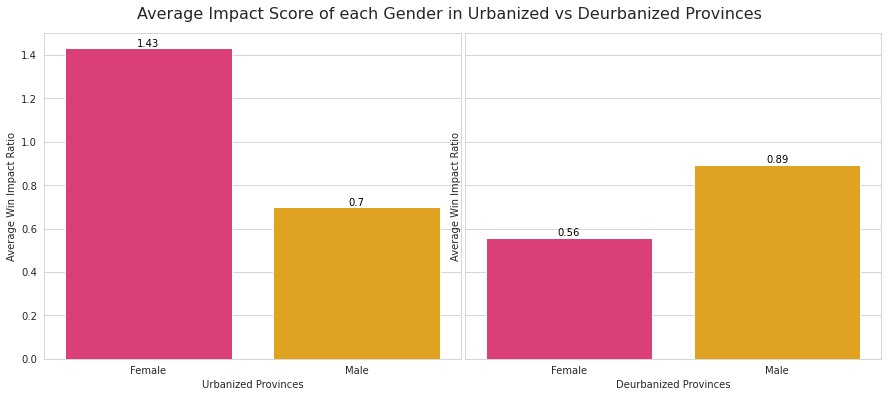

In [19]:
# Iterate Through all Provinces
fig, axes = plt.subplots(1, 2,
                         figsize=(15, 6),
                         sharey=True,
                         gridspec_kw={'wspace': .01,
                                      'hspace': .25})


df_urban = []
df_deurban = []
for i, prov in enumerate(prov_list):

    # Filter to the province
    df_prov = df[df['province'] == prov]

    df_votes = (df_prov.groupby(["city", "name", "Gender"])["votes"]
                       .sum()
                       .reset_index())

    df_win = (df_votes.groupby(["city"])["votes"]
              .max()
              .reset_index())
    df_win['winner'] = 'yes'
    df_votes = pd.merge(df_votes,
                        df_win[['winner', 'city', 'votes']],
                        how='left', on=['city', 'votes'])

    df_candidates = (df_votes.groupby(["city"])[['Gender']]
                             .value_counts().to_frame('count'))
    df_n_males = df_candidates.query('Gender == "male"').reset_index()
    df_n_females = df_candidates.query('Gender == "female"').reset_index()

    df_win = pd.merge(df_win,
                      df_n_males[["city", "count"]],
                      how="left", on=["city"])
    df_win = pd.merge(df_win,
                      df_n_females[["city", "count"]],
                      how="left", on=["city"]).dropna()
    df_win['total'] = df_win['count_x'] + df_win['count_y']

    df_win = pd.merge(df_win,
                      df_votes[['Gender', 'city', 'votes']],
                      how='left', on=['city', 'votes'])
    df_win['ratio'] = 0
    df_win.loc[df_win.query('Gender == "male"').index, 'ratio'] = (
        df_win['total'] / df_win['count_x']
    )
    df_win.loc[df_win.query('Gender == "female"').index, 'ratio'] = (
        df_win['total'] / df_win['count_y']
    )

    df_plot = df_win.groupby(['Gender'])['ratio'].sum() / df_win.shape[0]
    df_plot = df_plot.to_frame().reset_index()

    while len(df_plot) < 2:
        gender = [i for i in ['male', 'female']
                  if i not in df_plot['Gender'].values.tolist()]
        df_add = pd.DataFrame({'Gender': gender, 'ratio': [0]*len(gender)})
        df_plot = pd.concat([df_plot, df_add]).sort_values('Gender',
                                                           ascending=True)

    # Concate urbanized and deurbanized
    if i < 6:
        df_urban.append(df_plot)
    else:
        df_deurban.append(df_plot)

df_urban = pd.concat(df_urban, ignore_index=True)
df_deurban = pd.concat(df_deurban, ignore_index=True)


for i, df_group in enumerate([df_urban, df_deurban]):
    df_plot = (df_group.groupby(['Gender'])['ratio']
                       .mean()
                       .to_frame()
                       .reset_index())
    palette = ['#f42571', '#feae02']

    sns.set_style("whitegrid")
    sns.barplot(data=df_plot,
                x='Gender',
                y='ratio',
                palette=palette,
                ax=axes[i])
    axes[i].bar_label(axes[i].containers[0],
                      df_plot['ratio'].round(2),
                      label_type='edge', color='black', )

    # Set Visible Labels
    if i == 0:
        axes[i].set_xlabel('Urbanized Provinces')
    else:
        axes[i].set_xlabel('Deurbanized Provinces')
    axes[i].set_ylabel('Average Win Impact Ratio')
    axes[i].set_xticklabels(['Female', 'Male'])

    # Set Title for the Whole Figure
    fig.suptitle('Average Impact Score of each Gender in ' +
                 'Urbanized vs Deurbanized Provinces',
                 fontsize=16, y=.94)

<p style="text-align: justify">
&emsp;For the representative provinces, the overall win impact of females are generally higher than the males in urbanized provinces. In the deurbanized provinces, only Lanao del Sur had a non-zero impact score. This seemingly different behavior in Lanao del Sur can be attributed to the prevalent political gatekeeping in the said province.
</p>

<p style="text-align: justify">
&emsp;The first point of this study was to determine if there was a relationship between provinces that had experienced rapid urbanization or deurbanization with their choice of female or male candidates. We found that female candidates from urbanized provinces had more than twice the chance of beating their male counterparts. One important factor that we didn’t consider was that several female candidates run as placeholders to their husbands or other relatives, to bypass term limits. Local politics remains dynastic in nature with family members running in different municipalities under the same name.This may be a significant factor for why females have a higher chance of winning versus their male counterparts, but needs to be explored further by checking the relationships between candidates of successive terms.
</p>

<p style="text-align: justify">
&emsp;We also found that those in deurbanized provinces had a third less chance than their male opponents. And that these provinces had fewer, if any female candidates running in their mayoral elections. This may stem from the traditional Filipino machismo mentality of males being better leaders in crisis situations. For further study, we would recommend extending the datasets to include more provinces with a greater number of female candidates. The limitation would be the amount of time required to manually gather the gender, re-electionist, and relationship data from various sources, especially from the more remote locations in the country, where online information is limited, when available.
</p>

<p style="text-align: justify">
&emsp;The second point of this study was to determine if re-electionists from deurbanized provinces were at a disadvantage, and whether gender was a factor. Counter-intuitively, We found that there was no significant change for re-electionists, whether they came from an urbanized or deurbanized province, even considering gender. This may reflect the strong control political families have over their bailiwicks, regardless of rapid changes in urbanization. 
</p>



# ***References & Acknowledgments***

[1] Current Affairs, G. M. A. and P. (n.d.). Election results (Philippines): ELEKSYON2016: GMA News Online. GMA News Online. Retrieved October 23, 2022, from https://www.gmanetwork.com/news/eleksyon2016/results/ 

[2] 2022 Philippine election results. PHVOTE. (n.d.). Retrieved October 24, 2022, from https://ph.rappler.com/ 

[3] BiliranIsland.com, P., Beltran, R. J., Renee, Hairstyles, Dyna, &amp; Santos, E. (2013, May 22). COMELEC official results: Biliran May 2013 local elections. Biliran Blogs. Retrieved October 23, 2022, from https://www.biliranisland.com/blogs/2013/05/15/biliran-may-2013-election-results/ 

[4] Wikimedia Foundation. (2022, October 20). 2016 Lanao del Sur local elections. Wikipedia. Retrieved October 23, 2022, from https://en.wikipedia.org/wiki/2016_Lanao_del_Sur_local_elections


In [4]:
!jupyter nbconvert --to html --no-input --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='{"hide_cell"}' Girl_Power.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Girl_Power.ipynb to html
[NbConvertApp] Writing 930975 bytes to Girl_Power.html
